In [1]:
import pandas as pd
import numpy as np
import dotenv
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

dotenv.load_dotenv('.env')

True

In [2]:
train = pd.read_parquet('./data/train_prep.snappy.parquet')
train['deal_probability_code'] = pd.cut(train['deal_probability'], bins=100).cat.codes
train['log_deal_probability'] = np.log(train['deal_probability'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
train['log_deal_probability'].replace([np.inf, -np.inf], np.nan).dropna()

0         -2.056585
2         -0.839862
3         -0.219114
4         -1.570361
5         -0.219114
7         -0.219114
10        -0.530127
12        -1.976308
16        -1.136314
19        -2.268957
22        -2.269731
25        -2.225994
31        -0.242059
33        -4.113527
34        -0.392332
35        -0.219114
38        -2.714169
43        -2.133687
44        -3.433617
47        -1.896587
48        -0.219114
49        -1.850300
51        -1.543744
52        -1.898254
55        -1.651667
56        -0.144783
60        -0.223144
61        -2.067829
62        -2.047013
63        -0.219114
             ...   
1503338   -0.801378
1503340   -1.298027
1503342   -1.225265
1503344   -0.938332
1503345   -0.219114
1503366   -0.782984
1503369   -2.133687
1503370   -0.219114
1503372   -0.190350
1503373   -0.219114
1503376   -0.264148
1503378   -2.087796
1503380   -0.219114
1503381   -1.898254
1503382   -1.098622
1503383   -0.485743
1503391   -1.377612
1503393   -1.901932
1503394   -1.087079


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


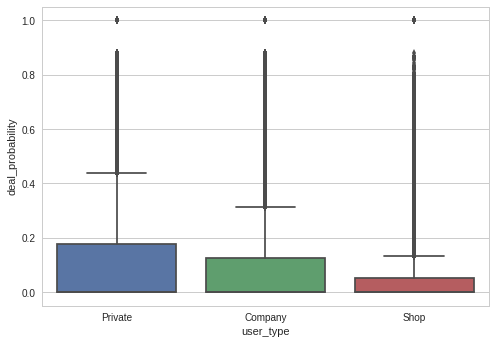

In [4]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x='user_type', y='deal_probability', data=train[['user_type', 'deal_probability']])

user_type
Company    AxesSubplot(0.125,0.125;0.775x0.755)
Private    AxesSubplot(0.125,0.125;0.775x0.755)
Shop       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

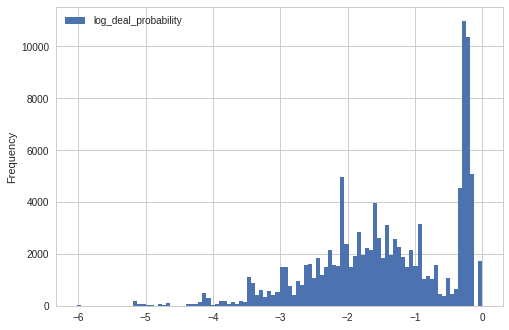

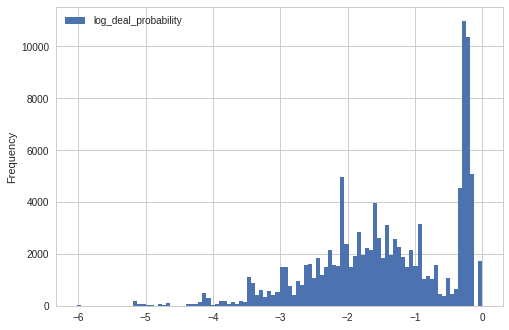

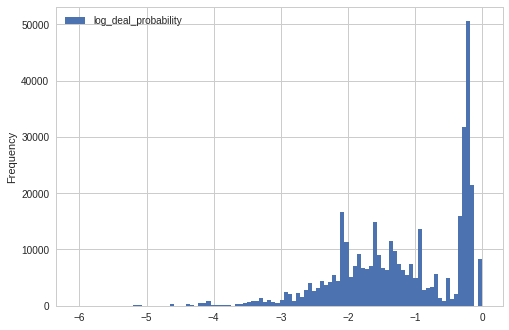

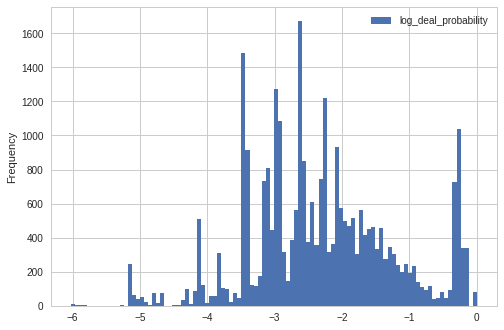

In [35]:
train[['user_type', 'log_deal_probability']].replace([np.inf, -np.inf], np.nan).dropna().groupby('user_type').plot.hist(bins=100)

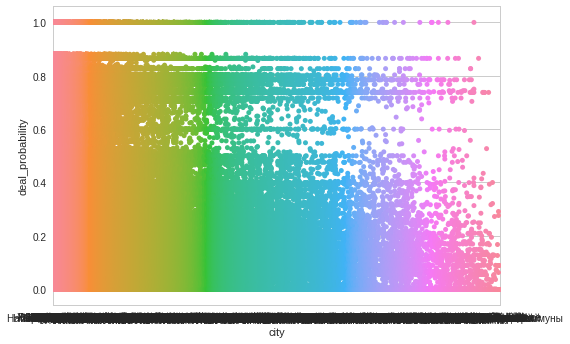

In [0]:
sns.stripplot(x='city', y='deal_probability', data=train[['city', 'deal_probability']])

In [0]:
# Let's say the embedding is only 1 dimension, what should be the value? I.e. Given 1 category, what should be the value that is best used for prediction?

# This depends on the objective function, but in most of the case, the value that gives the most information from a list of deal probability is its mean.

# If the distribution of deal probability for EACH category is a normal distribution, then the best embedding of size 2 seem to be mean and std.

# Even after sorting out the best way to represent EACH category (e.g. some may be normal distribution, some maybe other thing else), we need to sort our the best way to represent ALL category

# Even after sorting out the best way to represent ALL category in 1 feature, we need to figure out the best way to represent ALL features...

# And the best represetation that suit for the objective function

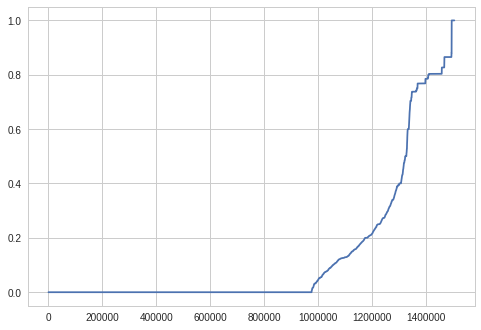

In [10]:
train['deal_probability'].sort_values().reset_index(drop=True).plot()